# Unsupervised Learning on Cervical Cancer Behavior Risk

The dataset was retrieved from the UC Irvine Machine Learning Repository. Courtesy goes to Dr. Sobar, Professor Rizanda Machmud and (Dr.) Adi Wijaya for providing the dataset to the repository.

## Table of Contents
* [Background](#background)
* [Exploratory Data Analysis](#eda)
* [Model Development](#models)
    * [Summary](#summary)
* [Discussion](#discussion)
* [Conclusion](#conclusion)



## Background <a class="anchor" id="background"></a>
Cancer is the uncontrollable growth of cells; cervical cancer is thus, the uncontrollable growth of cells in the cervix of women. According to the [CDC](https://www.cdc.gov/cancer/cervical/basic_info/index.htm) page for cervical cancer, "human papillomavirus(HPV) is the main cause of cervical cancer. HPV is a common virus that is passed from one person to another during sex. At least half of sexually active people will have HPV at some point in their lives, but few women will get cervical cancer". 

Accordingly, there are screening tests to detect HPV and there is the HPV vaccine which can help with cervical cancer prevention. Screening tests include the pap smear (looks for precancers, cells changes) and the HPV test (looks for presence of HPV). When detected early on, the cancer is treatable. 

The dataset provided by the UC Irvine Machine Learning Repository includes data from surveys conducted by the researchers, mentioned above, in Indonesia. The dataset is the result of the response of 72 respondents. The goal of the dataset was to attempt to predict cervical risk through behavioral measures. Sobar et al. used supervised learning methods, i.e. logistic regression, to determine cervical risk. More information can be found in their paper [here](https://www.researchgate.net/publication/318009235_Behavior_determinant_based_cervical_cancer_early_detection_with_machine_learning_algorithm). As the title says, this notebook is going try to use unsupervised learning to see whether we can detect signs of cervical cancer risks through cluster models.

### Goal
To reiterate, the goal of this notebook is going to be using unsupervised learning, more specifically clustering, to see whether we can differentiate groups that are susceptible to cervical cancer based on their behavioral determinants. The clustering model comparison will consist of 3 feature modifications: using the original data, using scaled data, and using post-PCA data. The models used will be hierarchical and K-means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import confusion_matrix

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [2]:
data = pd.read_csv('sobar-72.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

Initial inspection shows 72 data points and none of the columns seem to have null values. There are 20 columns total. The goal is going to be trying to use unsupervised learning to identify the ca_cervix column, i.e. the presence or absence of cervical cancer.

According to the background information provided by the dataset, there are 19 attributes that come from 8 variables. The variables is written as the first part of the attribute name - behavior, intention, attitude, norm, perception, motivation, socialSupport, and empowerment.

In [3]:
data.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [4]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


Looking at the description and a subset of the dataset, the values are related to each respondents' answers to the questionaire. But, it isn't clear what the values represent in terms of context. It is unclear what the measure of the values are; are they representing awareness, their thoughts towards each attribute, or something else?

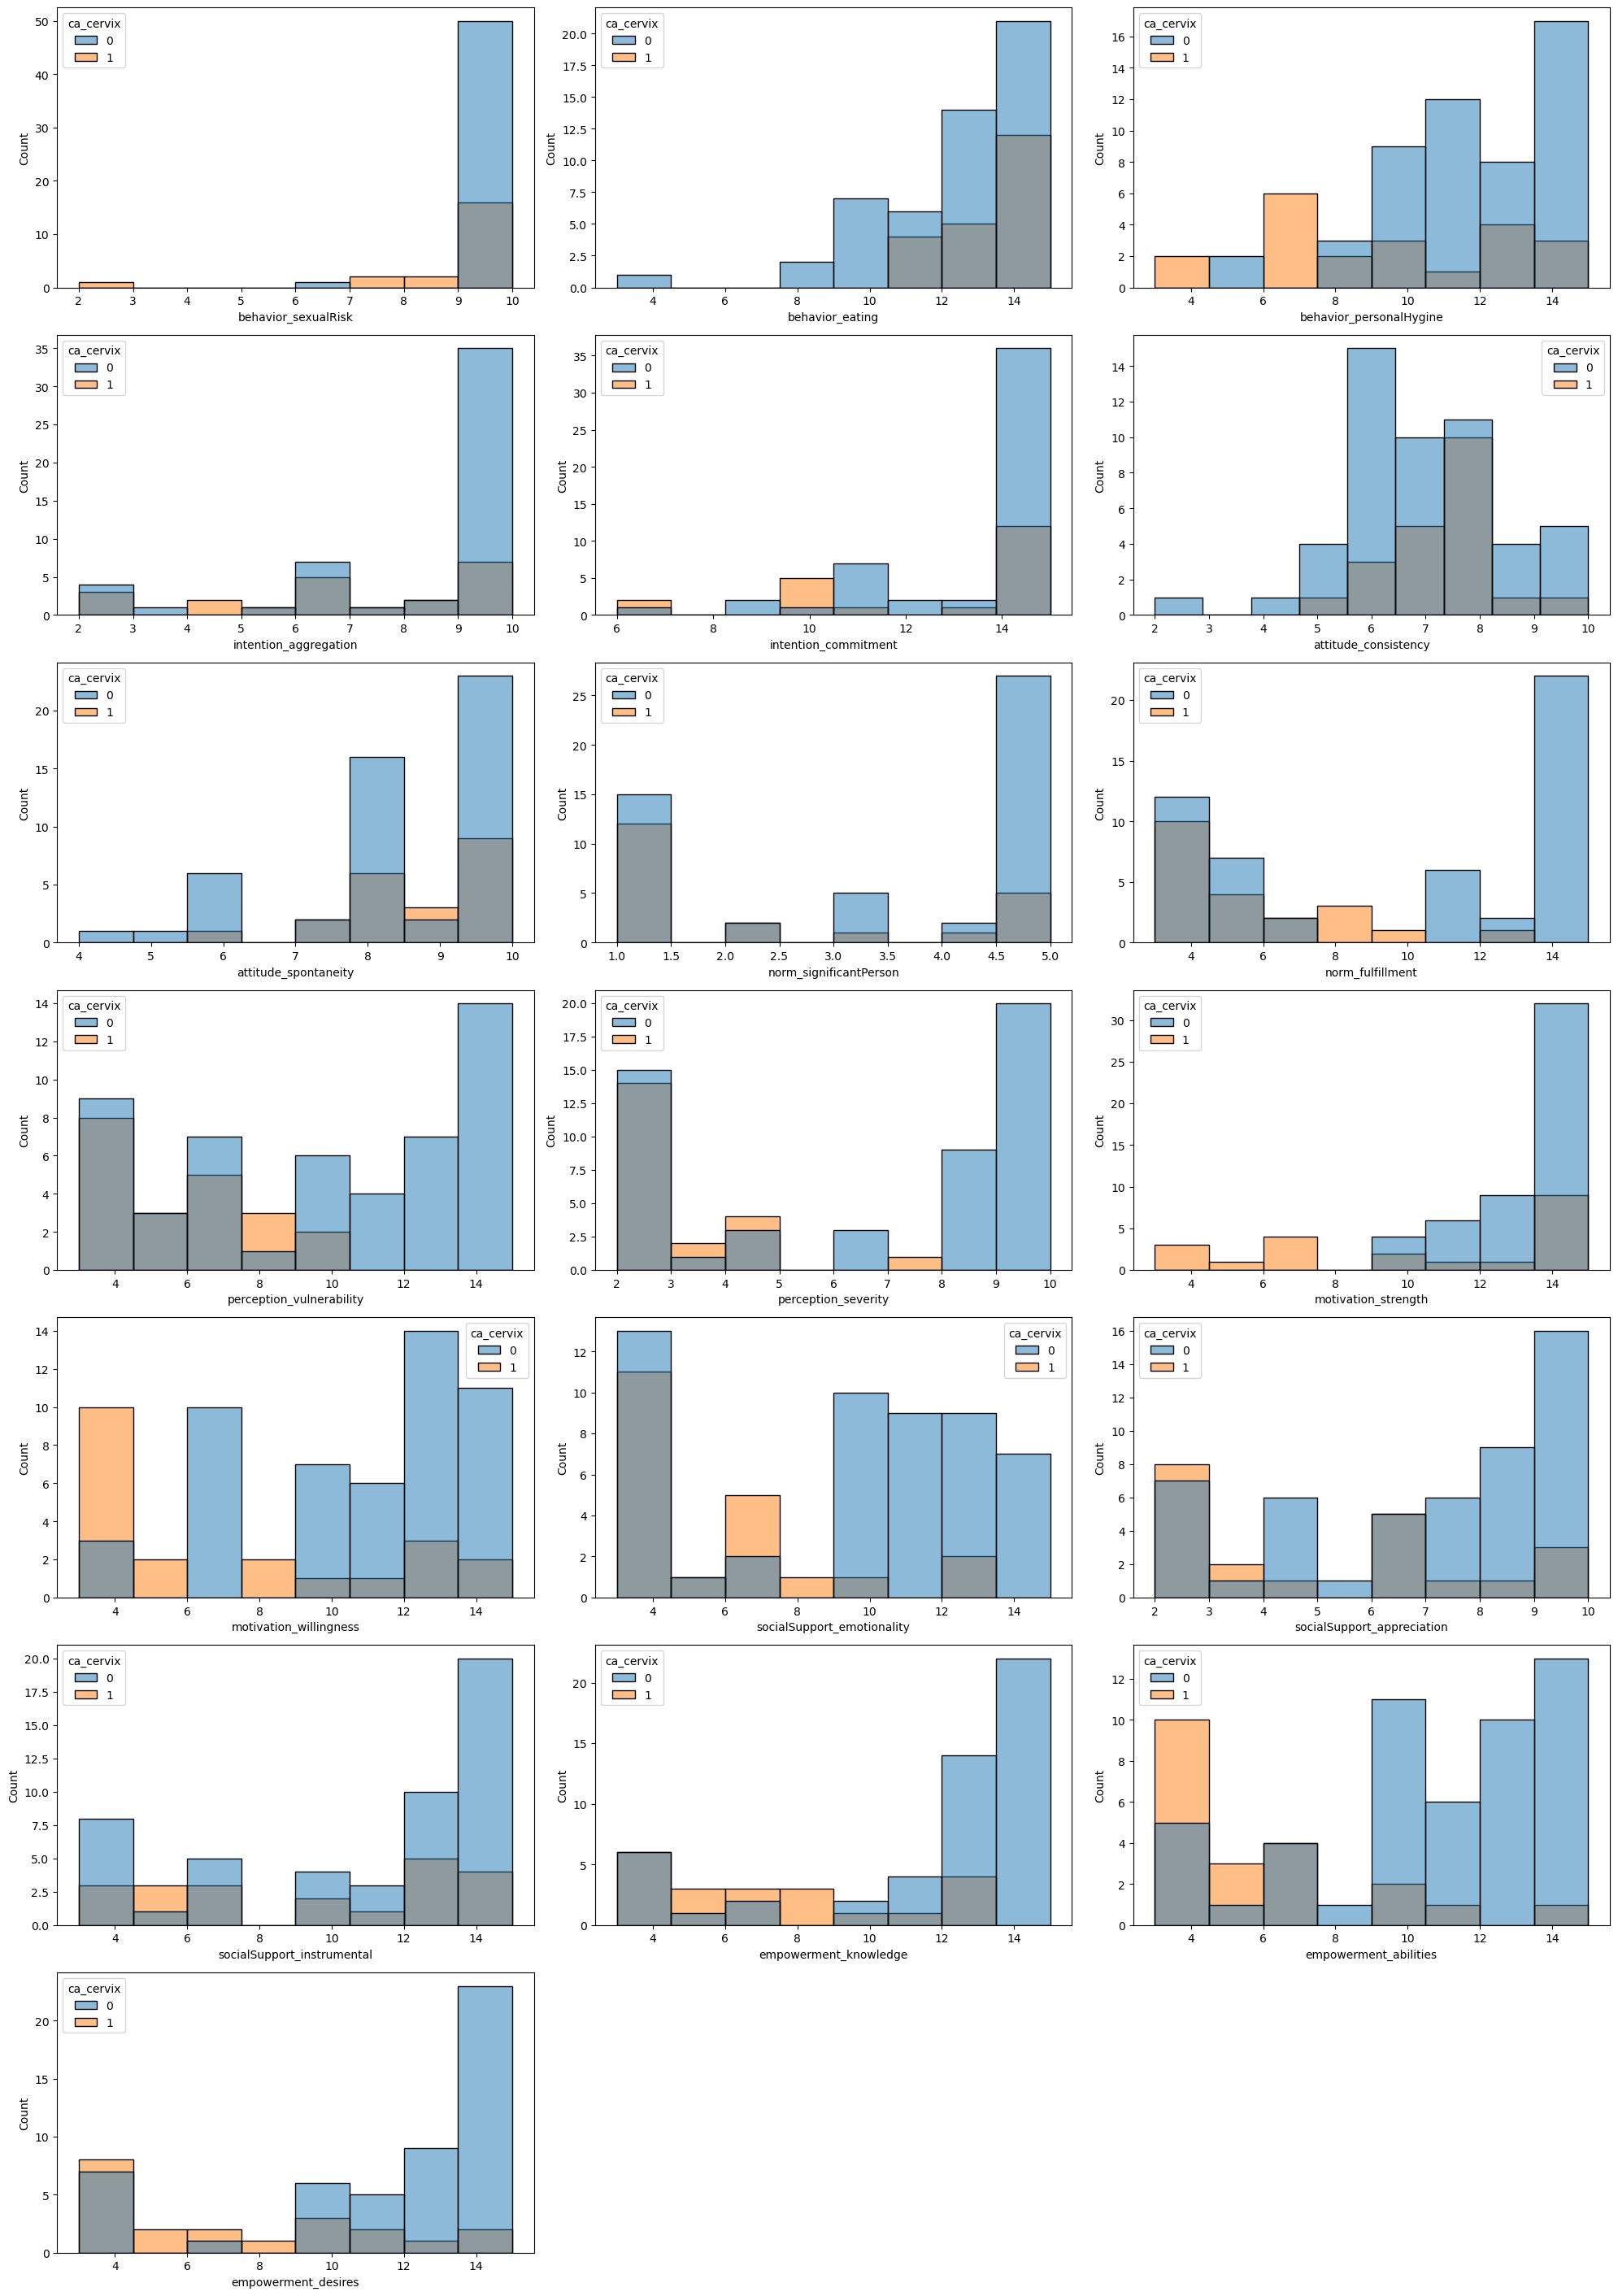

In [5]:
columns = list(data.columns.values)
columns.remove('ca_cervix')

fig = plt.figure(figsize=(20, 40))
rows, cols = 10, 3
for i, col in enumerate(columns):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.histplot(data=data, x=col, hue='ca_cervix')
    ax.set_xlabel(col)
    
fig.tight_layout()
plt.show()

In the plots above, we can see that there is a range of data and the attributes don't look normal. I think it's necessary for it to be normal for unsupervised learning methods. From the histogram, we also notice some points that could outliers; for example in the behavior_sexualRisk plot, most points are under 10 whereas theres a lone point at 2. The same pattern can be seen in the intention_commitment plot. We are not going to remove the outliers however, because they may be useful in the clustering differentiation process. 

We do see some small trends for example in the percception_vulnerability chart, we see that respondents with cervical cancer tend to have mid-low answers to the related questions and none of the higher answers has cervical cancer. There is also the empowerment_abilities plot that shows low scores tend to have the cancer. 

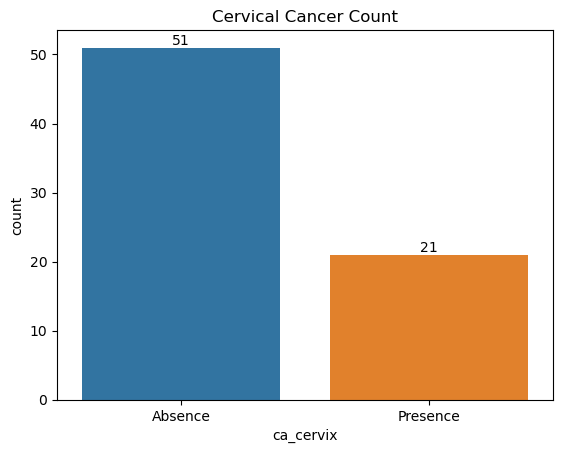

In [6]:
ax = sns.countplot(data=data, x='ca_cervix')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Absence','Presence'])
plt.title('Cervical Cancer Count')
plt.show()

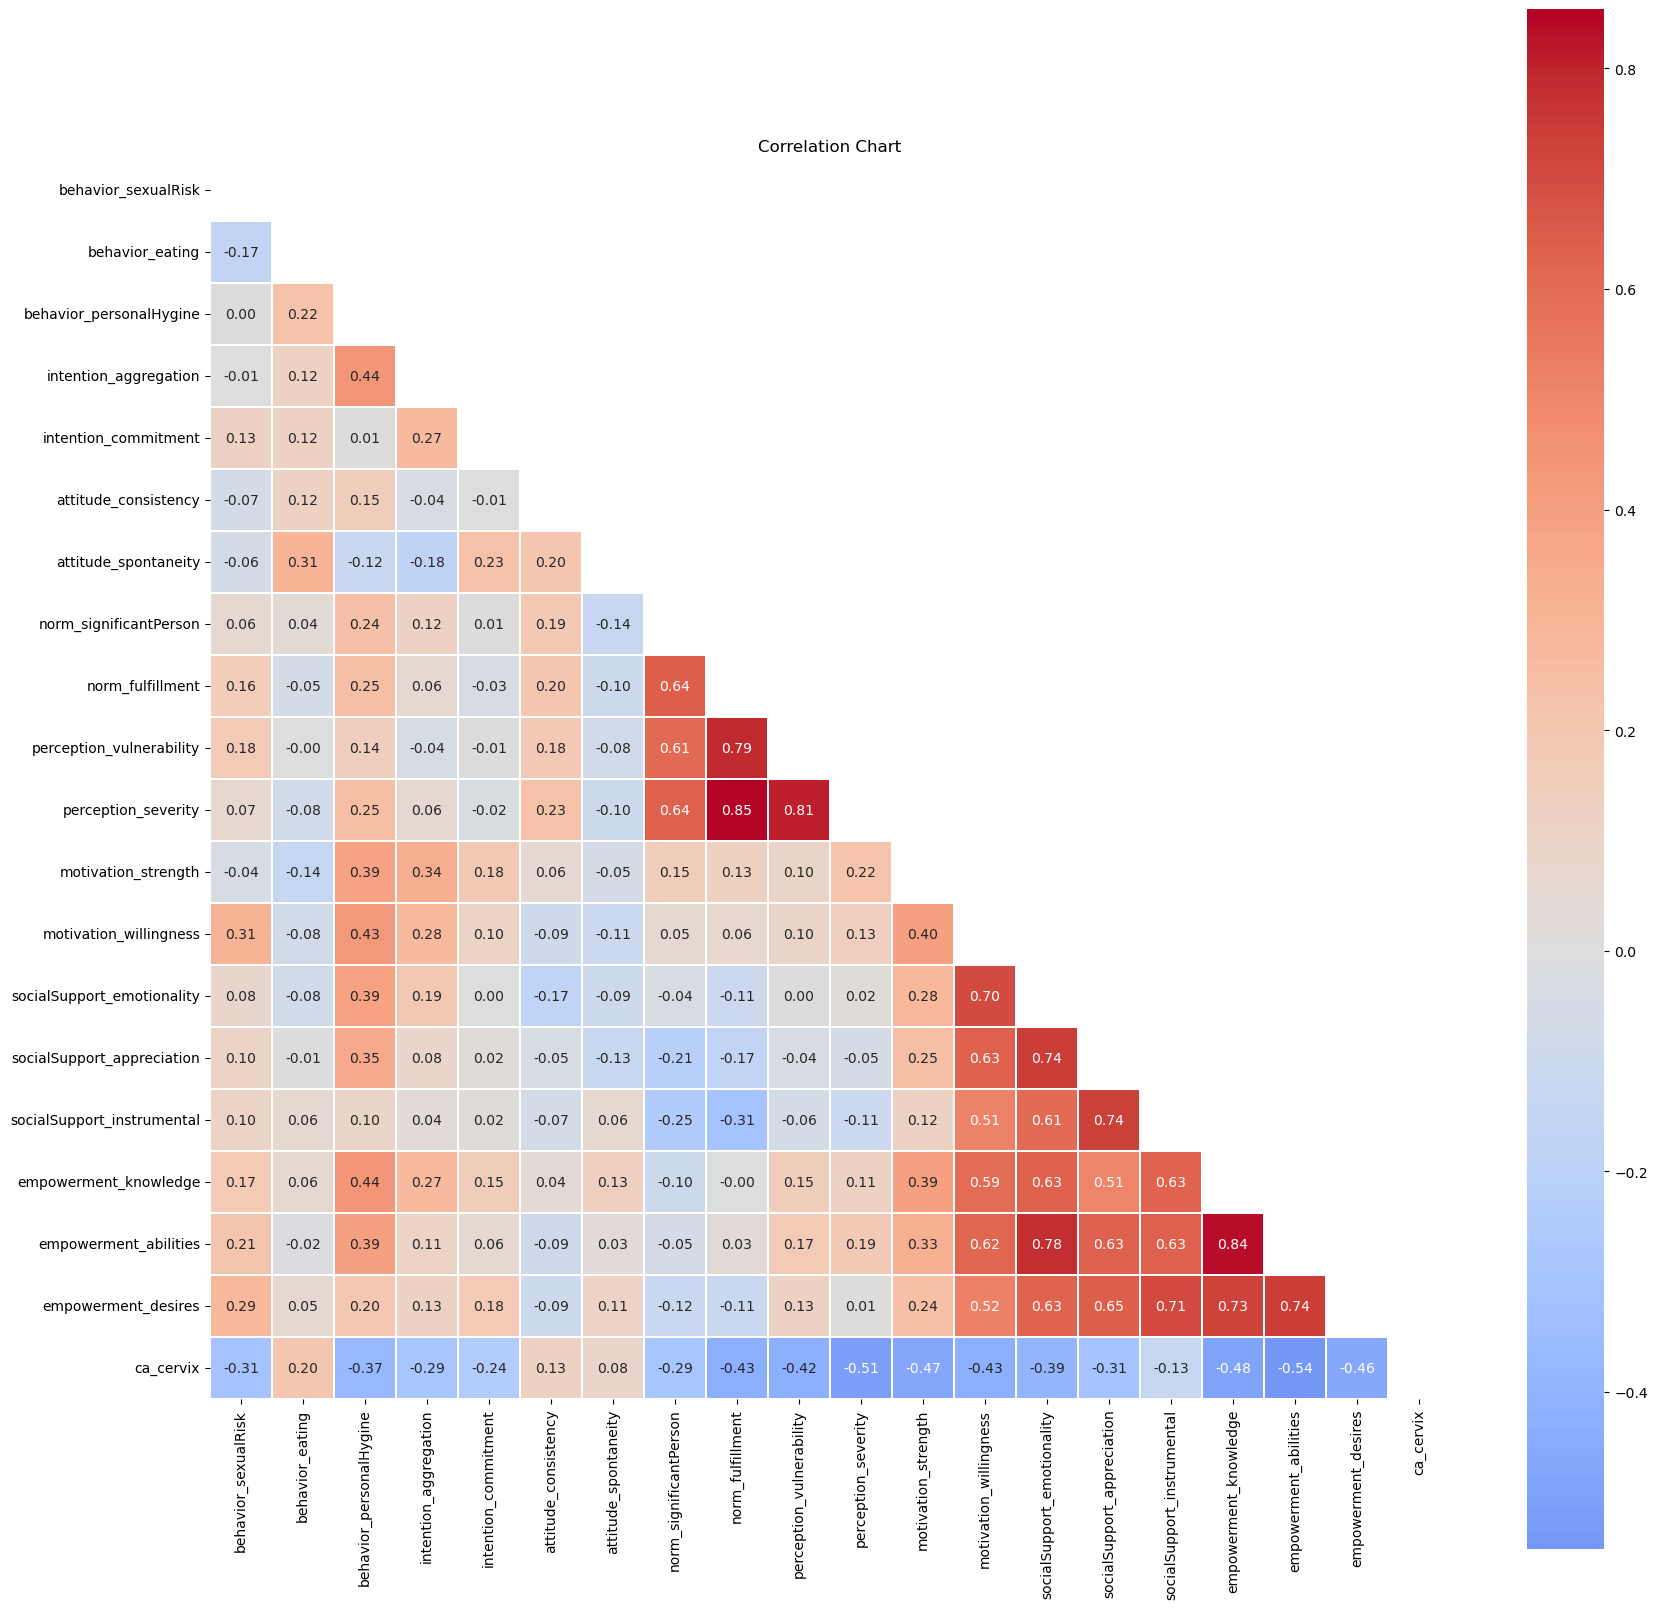

In [7]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, linewidths=0.05, center=0, cmap='coolwarm', mask=mask, square=True, annot=True, fmt=".2f")
plt.title('Correlation Chart')
plt.show()

We see from the correlation plot that some attributes are highly correlated with each other. For example, perception_severity and norm_fulfillment are highly correlated at 0.85. Another notable one is empowerment_abilities and empowerment_knowledge at 0.84. This one you can reason out that the more knowledge someone has on the cancer, the more they feel they are in control of preventing it. 

In the plot below is the correlation of cervical cancer against all the attributes. We see that the highest correlation is a negative correlation with empowerment_abilities at -0.54.

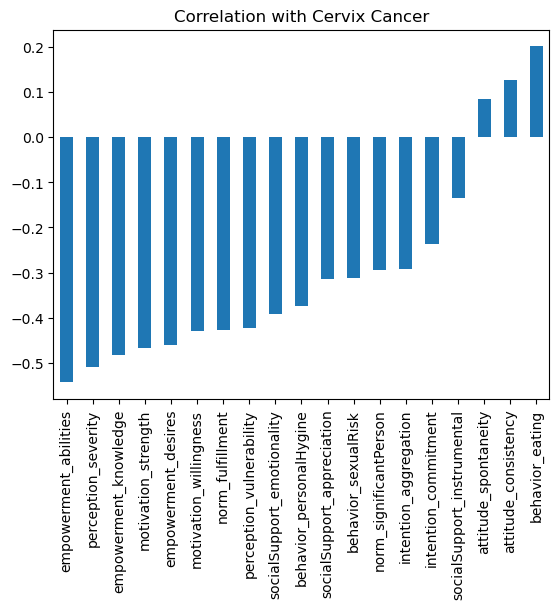

In [8]:
data.corr()['ca_cervix'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation with Cervix Cancer')
plt.show()

Because we are going to be using unsupervised learning methods, the apparent relationships we see from the plots above is good to note but won't be useful in the clustering process. Unsupervised learning is trying to find latent patterns to separate the respondents into groups - presence of absence of cervical cancer. 

Because the labels are given to us, we are going to use it to compare with the cluster models.

Below we scale the data between 0 and 1 using the standard scaler function. This will be the scaled features used for modeling. I choose to scale the data because as seen in the description of the dataset, the features have different min and max values. This corresponds to questions that had answers ranging from 0 to 10, 0 to 15, etc. Scaling the features would put them all on the same footing for model development.

In [9]:
features = data.drop(['ca_cervix'], axis=1)

In [10]:
scaler = StandardScaler()
scaler.fit(features)

features_scaled = pd.DataFrame(scaler.transform(features), columns=features.columns)

Finally, all that's left is the PCA feature set. Why choose to do a PCA when the number of features isn't overly large or sparse? I chose to perform a PCA feature just to reduce the number of dimensions and also to try to reduce the correlation present between the features which may lead to some unknown interactions. Instead PCA will just create a number of features that explains the most variance in the dataset.

In [11]:
explained_var = []
for i in range(1,20):
    pca = PCA(n_components=i).fit(features_scaled)
    explained_var.append(sum(pca.explained_variance_ratio_))

The chosen cutoff for PCA is going to be around 90% explained variance. This seems to be around 10-features so that's what is going to be used for the PCA features part of the model development.

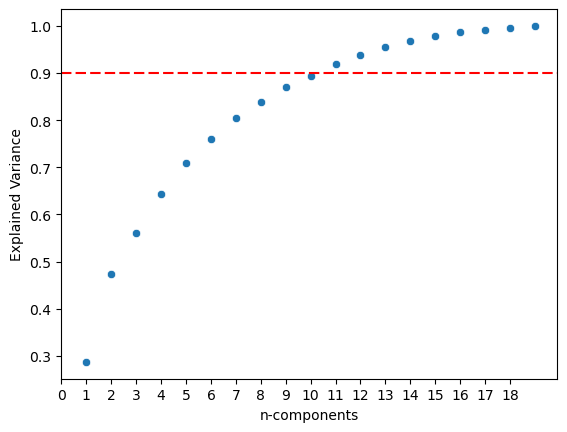

In [12]:
ax = sns.scatterplot(x=range(1, 20), y=explained_var)
ax.set_xticks(range(len(explained_var)), labels=range(0,19))
ax.axhline(.9, color='red', dashes=(5, 2))
plt.xlabel('n-components')
plt.ylabel('Explained Variance')
plt.show()

In [13]:
pca = PCA(n_components=10).fit(features_scaled)
pca_features = pca.transform(features_scaled)

In [14]:
pca_features[0]

array([ 0.34259186, -0.93663453,  0.44628193,  1.25042552,  2.13653477,
        1.04437742, -1.49113714, -1.74232282, -0.24873946,  0.98933645])

In [15]:
pca_df = pd.DataFrame(pca_features)

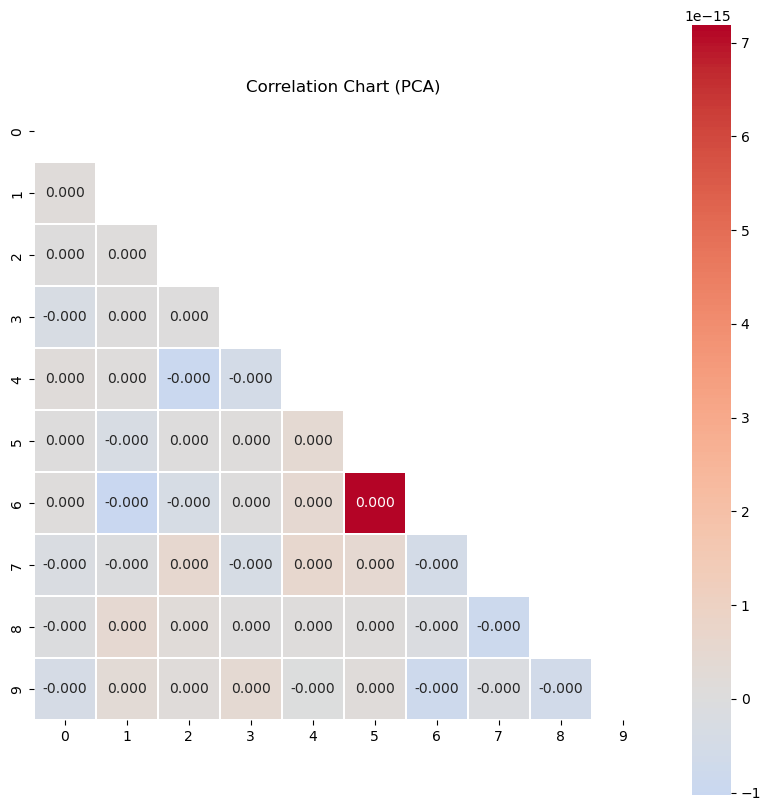

In [16]:
corr_pca = pca_df.corr()
mask = np.triu(np.ones_like(corr_pca, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_pca, linewidths=0.05, center=0, cmap='coolwarm', mask=mask, square=True, annot=True, fmt=".3f")
plt.title('Correlation Chart (PCA)')
plt.show()

You see that after the PCA, the features chosen have basically 0 correlation with each other.

## Model Development <a class="anchor" id="models"></a>

### Using Original Data

Running an initial hierarchical clustering method. 'n_clusters' is set at 2 because that's what we are hoping to separate into presence and absence of cancer.

In [17]:
model = AgglomerativeClustering(n_clusters=2, linkage='average').fit(features)
model.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

accuracy: 0.8194444444444444


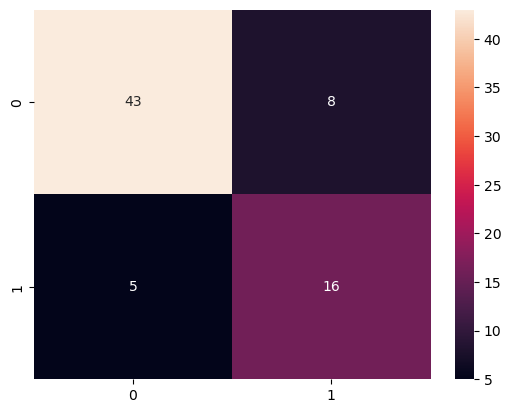

In [18]:
n = len(data)
print('accuracy:', sum(model.labels_ == np.array(data.ca_cervix)) / n)

sns.heatmap(confusion_matrix(y_pred=model.labels_, y_true=np.array(data.ca_cervix)), annot=True)
plt.show()

We have here that the accuracy of the clusters to the labels are around 82%. This is pretty decent. Looking at the confusion matrix we see that the cluster does relatively well. It has a precision of (16/24) = 67% and a true positive rate of (16/21) = 76% and a false negative (5/21) = 24%.

Cancer in general is a detrimental disease to have, thus it's important to discern whether a person has it or not. As a result, it's important to look at the accuracy of the model and the false negative rate and hopefully have the FNR as low as possible.

Next, we are going to see whether an adjustment to the hierarchical cluster model can improve those metrics.

In [19]:
def agcluster(feature_df, n):
    acc=0
    for i in ['ward', 'complete', 'average', 'single']:
        for j in ['euclidean', 'manhattan', 'l1', 'l2', 'cosine']:
            try:
                mod = AgglomerativeClustering(n_clusters=2, linkage=i, affinity=j).fit(feature_df)
                total = max(sum(mod.labels_ == np.array(data.ca_cervix)), sum(mod.labels_ != np.array(data.ca_cervix)))
                acc_mod = total/n
                if acc_mod >= acc:
                    acc = acc_mod
                    print(i, j, round(acc, 5))
                    sns.heatmap(confusion_matrix(y_pred=mod.labels_, y_true=np.array(data.ca_cervix)), annot=True)
                    plt.ylabel('True Labels')
                    plt.xlabel('Predicted Labels')
                    plt.show()
                    
            except:
                continue

ward euclidean 0.83333


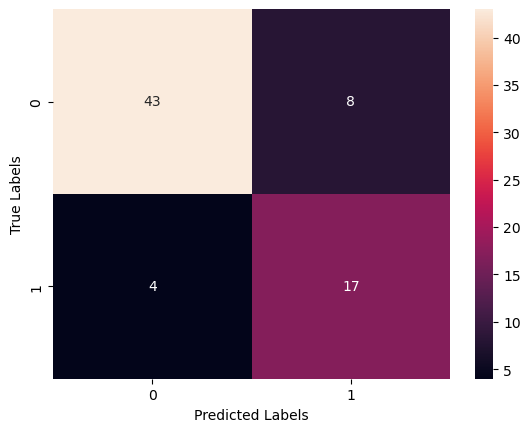

average manhattan 0.83333


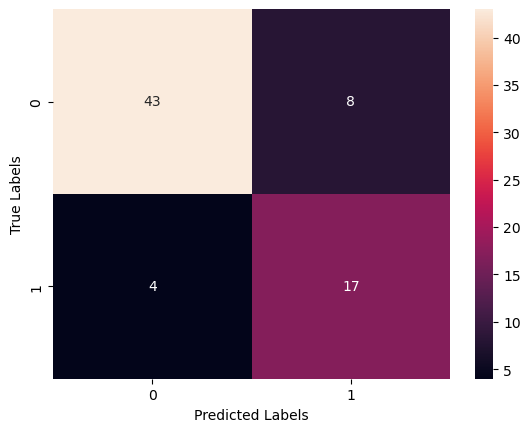

average l1 0.83333


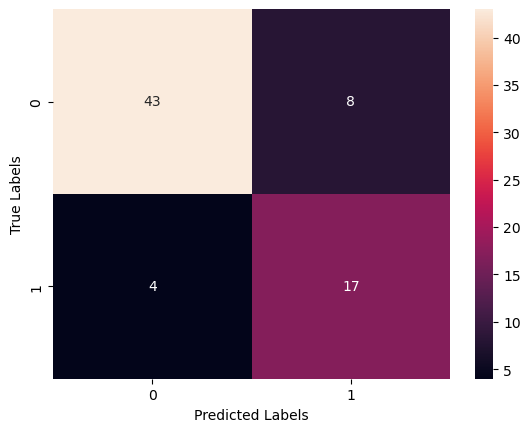

In [20]:
agcluster(features, n)

We see that the linkage-metric combination that yielded the highest accuracy is [ward, euclidean], [average, manhattan], and [average, l1] at 83%. We see that these models yield the same result with 1 less false negative (19% FNR) compared to the initial model.

Next, we are going to try the K-means clustering method to see whether there is any differences.

accuracy: 0.7777777777777778


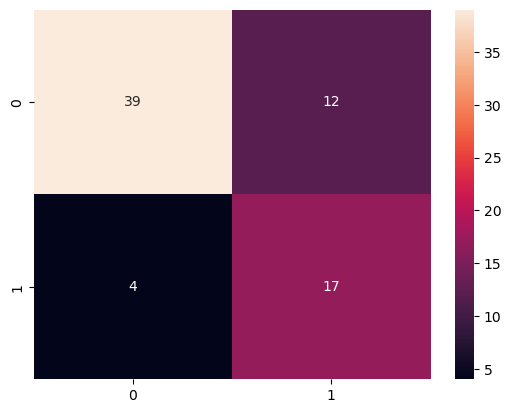

In [21]:
kmeans = KMeans(n_clusters=2, random_state=41).fit(features)
print('accuracy:', max(sum(kmeans.labels_ == data.ca_cervix), sum(kmeans.labels_!=data.ca_cervix)) / n)

sns.heatmap(confusion_matrix(y_pred=kmeans.labels_, y_true=np.array(data.ca_cervix)), annot=True)
plt.show()

- Accuracy: 78%
- FNR: 19%

The initial K-means model yielded a lower accuracy, 5% less, than the best hiearchical model. 

Let's see if there can be any further adjustments to be made.

In [22]:
def kmeanscluster(features_df, n):
    acc = 0
    for i in ['auto', 'elkan']:
        for j in ['k-means++', 'random']:
            km_mod = KMeans(n_clusters=2, init=j, algorithm=i, random_state=41).fit(features_df)
            total = max(sum(km_mod.labels_ == np.array(data.ca_cervix)), sum(km_mod.labels_ != np.array(data.ca_cervix)))
            acc_mod = total/n
            if acc_mod >= acc:
                acc = acc_mod
                print(i, j, round(acc, 5))
                sns.heatmap(confusion_matrix(y_pred=km_mod.labels_, y_true=np.array(data.ca_cervix)), annot=True)
                plt.ylabel('True Labels')
                plt.xlabel('Predicted Labels')
                plt.show()

auto k-means++ 0.77778


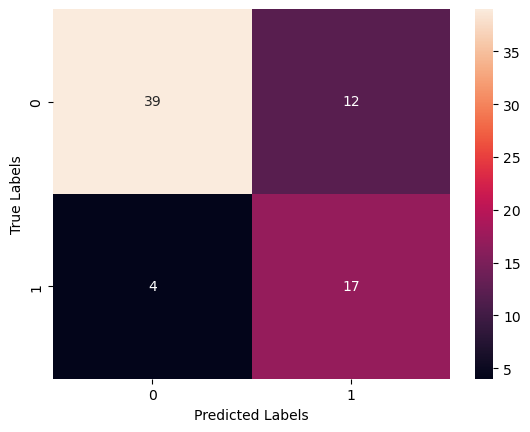

auto random 0.77778


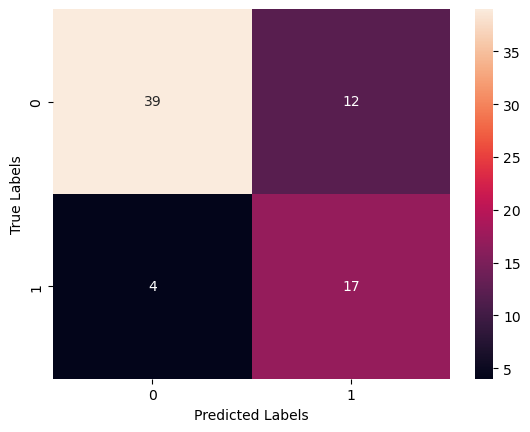

elkan k-means++ 0.77778


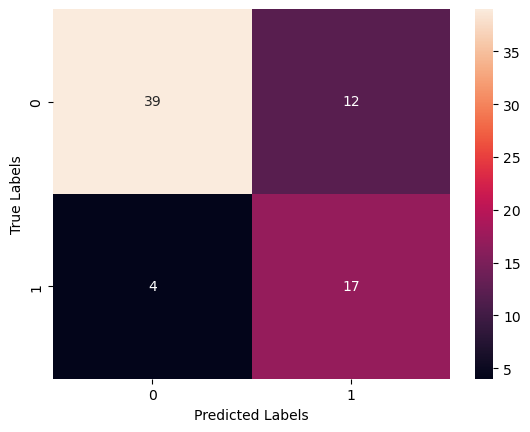

elkan random 0.77778


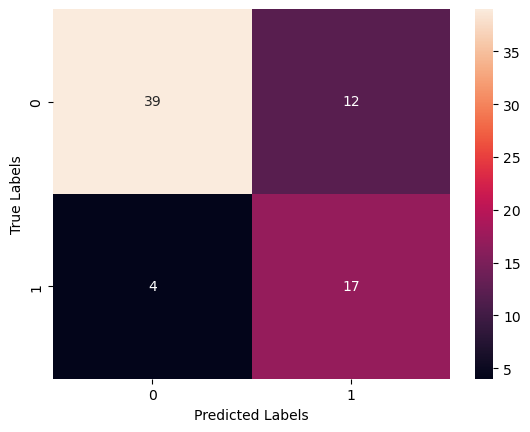

In [23]:
kmeanscluster(features, n)

Looks like nothing changed even with different parameters. 

### Using Scaled Features

ward euclidean 0.83333


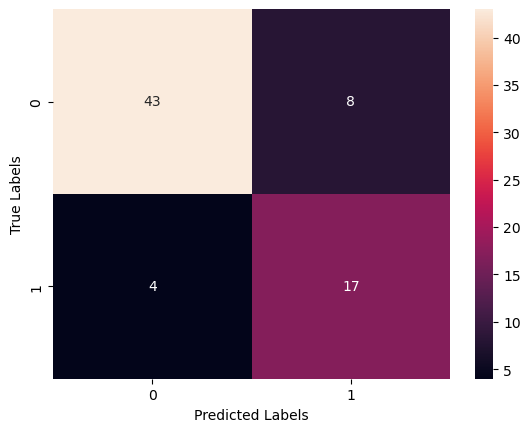

complete manhattan 0.83333


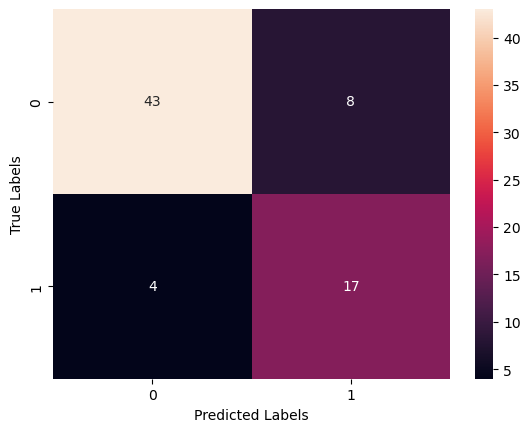

complete l1 0.83333


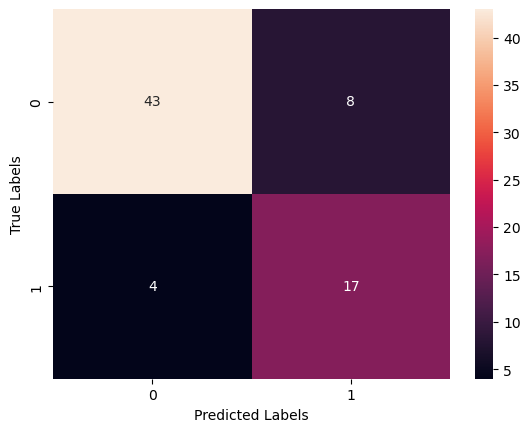

In [24]:
agcluster(features_scaled, n)

Nothing changed from the hierarchical model.

auto k-means++ 0.79167


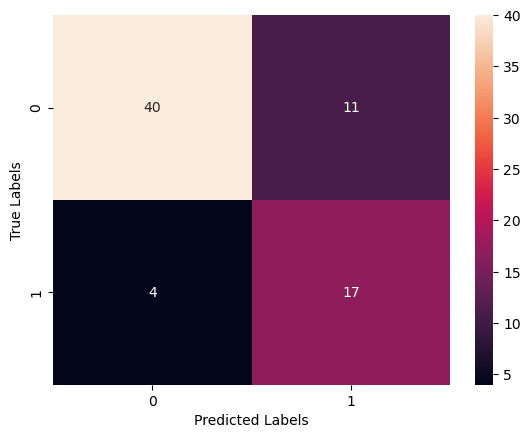

auto random 0.79167


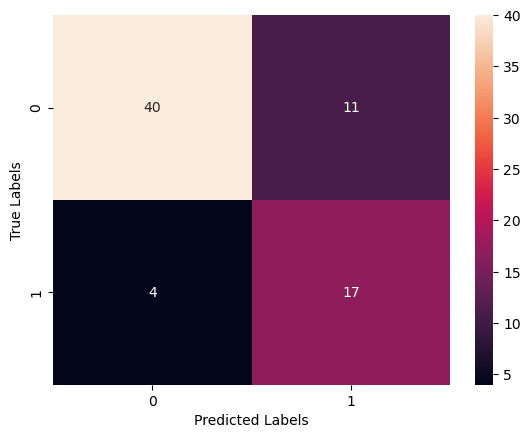

elkan k-means++ 0.79167


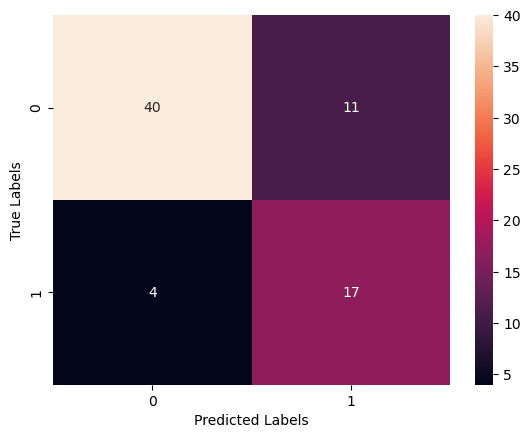

elkan random 0.79167


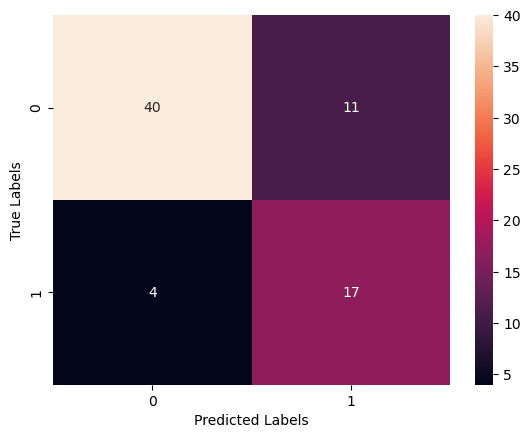

In [25]:
kmeanscluster(features_scaled, n)

The K-means model does see a very small improvement in their accuracy - 78% to 79%. The FNR remains the same.

### Using PCA Features

ward euclidean 0.70833


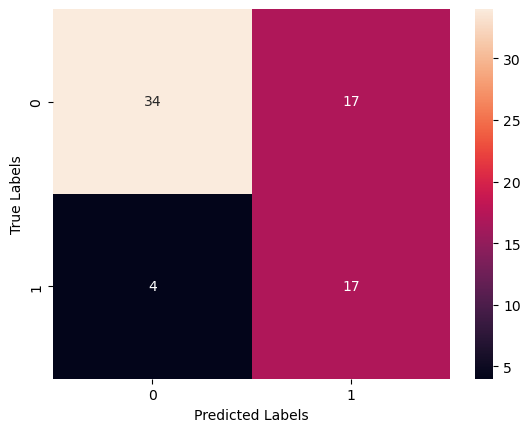

complete euclidean 0.72222


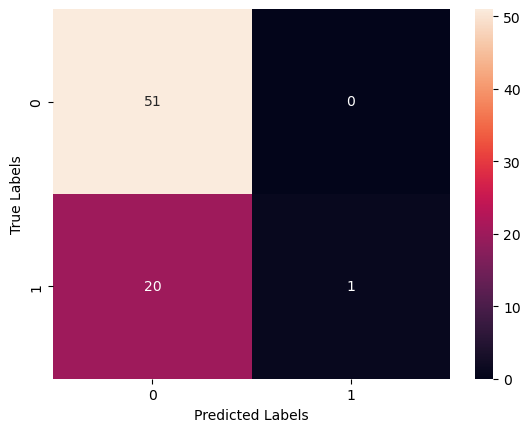

complete manhattan 0.72222


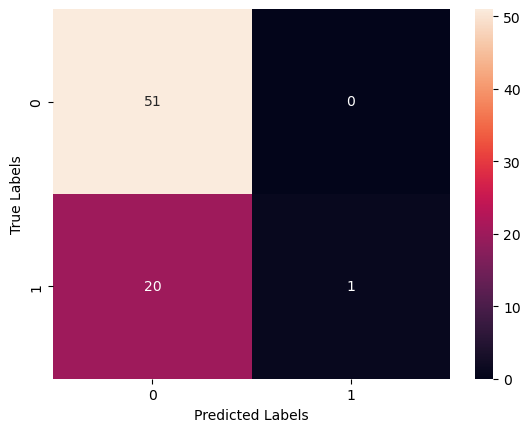

complete l1 0.72222


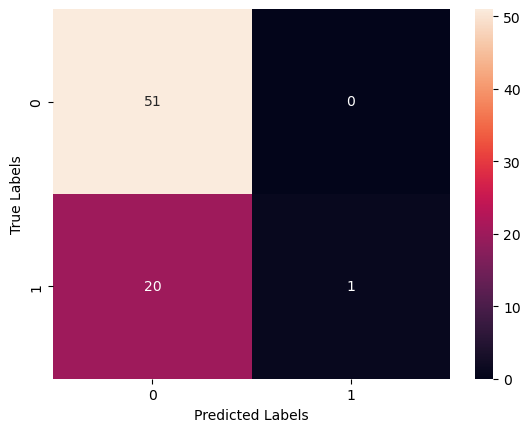

complete l2 0.72222


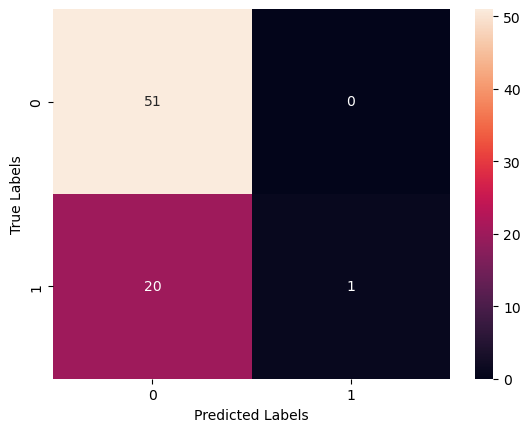

complete cosine 0.79167


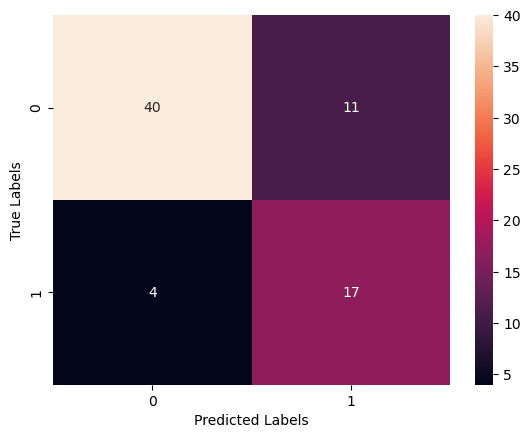

In [26]:
agcluster(pca_features, n)

auto k-means++ 0.79167


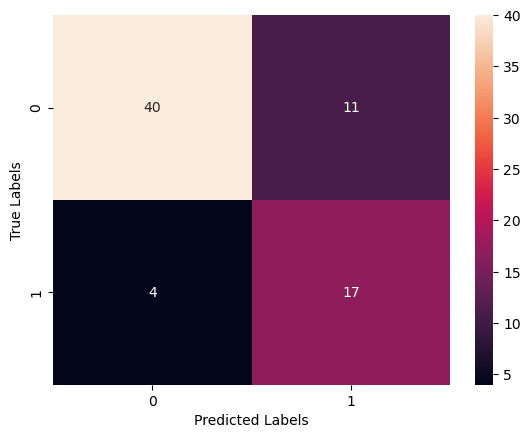

auto random 0.79167


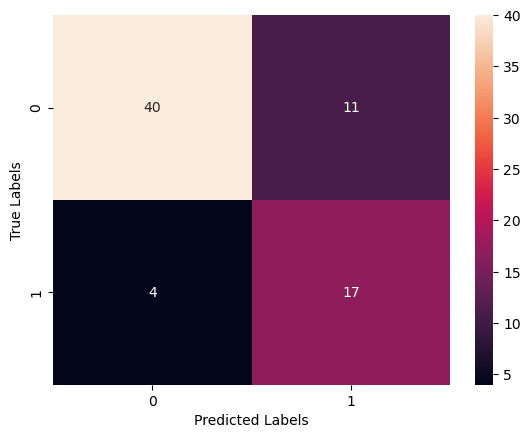

elkan k-means++ 0.79167


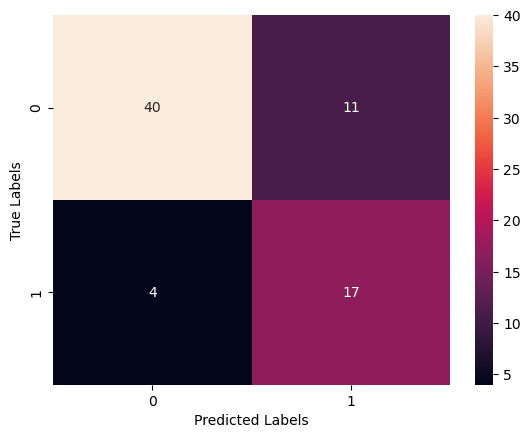

elkan random 0.79167


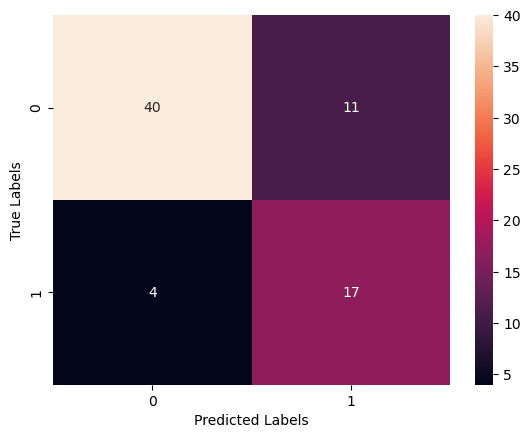

In [27]:
kmeanscluster(pca_features, n)

### Summary <a class="anchor" id="summary"></a>

| Method | Original Features | Scaled Features | PCA Features |
| --- | --- | --- | --- |
| Hiearchical Clustering | 0.833 | 0.833 | 0.792 |
| KMeans Clustering | 0.778 | 0.792 | 0.792 |

In summary we see that scaling the features increased the K-means result and that performing pca on the scaled features yielded the same result. In contrast, the hierarchical clustering yielded the highest accuracy on the original dataset and after scaling it. The FNR is not shown but it was the same for all best models under each category at 19%.

The hiearchical clustering yielded the highest accuracy using the original dataset probably because there was more context involved in the clustering which helped group certain points together. K-means didn't do as well there because the scaling was different very some features which may have caused some points to be further away then should be. Also K-means is highly susceptible to the effects of outliers and remember, there were some points that were outliers which may have caused the mean centroids to shift in certain directions that would miss some points. You do see it improve after scaling.

In general, it would be best to scale the features for clustering and in this case, hierarchical clustering is the best model.

## Discussion <a class="anchor" id="discussion"></a>

Cervical cancer is one of the cancers that when found early, can be treatable. It is important to find methods to be able to detect it early on. Previously mentioned, there are screening tests that can help detect the presence of the HPV itself and signs of cell changing but these are pretty much after the fact. If we were able to use behavior determinants to find people at risk of cervical cancer, prventative measures can given to the people.

As we see from the results, clustering can help determine the presence/absence of cervical cancer with an overall accuracy of 83% and a false negative rate of 19%. It is a decent model and can be used as possible precursory test to find people at risk of cervical cancer. 

It is important to consider that the data was obtained via a questionaire. Questionaires are subject and the phrasing of questions may cause different understanding of what is asked of the respondents. We also don't know what was asked for each behavioral determinant in the questionaire. Another consideration is the location of the survey. The dataset values originally came from responses from Indonesian women. Not to say they are not important, but due to the culture, the data may not be representative for the entire women population.

For future works, hopefully there would be more data available and perhaps more variety in the data. Variety in terms of the nationality of the women so we can see a more representative response and thus a more representative model.

## Conclusion <a class="anchor" id="conclusion"></a>

Hierarchical modeling is a viable method for determining women at risk of cervical cancer based on their behavioral determinants. The model yield a decent accuracy of 83% and a false negative rate of 19%. It seems relatively high for some but the result came from a dataset with 72 points and fewer examples of true positives. There are some improvements that could be done but in the context of women in Indonesia, this hierarchical modeling is potential screening method for cervical cancer. 